# Homework 4: Task 2 "False Color" 11/24/2024

## Sections 3-5 Criteria

**3. True color image**

a. Construct a file path to the Landsat data using os and import it using rioxr.open_rasterio().

b. Explore the data and write a brief summary of the information you obtained from the preliminary information. Your summary should include the a description of the data’s variables and dimensions.

c. Drop the band dimension of the data. HINT: squeeze() and drop_vars().

d. Without creating any new variables:

- select the red, green, and blue variables (in that order) of the xarray.Dataset holding the Landsat data

- convert it to a numpy.array using the to_array() method

- then use .plot.imshow() to create an RGB image with the data. There will be a warning, that’s ok.

e. Adjust the scale used for plotting the bands to get a true color image. HINT: Check the robust parameter. The issue here is the clouds: their RGB values are outliers and cause the other values to be squished when plotting.

f. In a markdown cell write a brief explanation comparing the ouputs for parts (d) and (e).

**4. False color image**
- Without creating any new variables, create a false color image by plotting the short-wave infrared (swir22), near-infrared, and red variables (in that order).

**5. Map**
a. Create a map showing the shortwave infrared/near-infrared/red false color image together with the Thomas Fire perimeter. Customize it appropriately including, at least, an informative title and legend.

b. Write a figure description for the map including a brief explanation of how false color imagery is being used.


In [1]:
# Importing the libraries for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os 
import geopandas as gpd
import rioxarray as rioxr
from shapely import box

In [2]:
# Import file path
root = os.path.join('/',
                    'courses',
                    'EDS220',
                    'data',
                    'hwk4_landsat_data')
root

'/courses/EDS220/data/hwk4_landsat_data'

In [3]:
# Read in the filepath and create the landsat variable
fp= os.path.join ( root,
                 'landsat8-2018-01-26-sb-simplified.nc')
landsat= rioxr.open_rasterio(fp)
landsat

<xarray.Dataset>
Dimensions:      (y: 731, x: 870, band: 1)
Coordinates:
  * y            (y) float64 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
  * x            (x) float64 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * band         (band) int64 1
    spatial_ref  int64 0
Data variables:
    red          (band, y, x) float64 ...
    green        (band, y, x) float64 ...
    blue         (band, y, x) float64 ...
    nir08        (band, y, x) float64 ...
    swir22       (band, y, x) float64 ...

**Answer to Question 3b.)**

The landsat data set consists of only one band, with float64 x and y coordinates and 5 variables: 
- red (red band with wavelengths 0.64-0.67 micrometers), 
- green (green band with wavelengths 0.53-0.59 mircometers), 
- blue (blue band with wavelengths 0.45-0.51 mircometers), 
- nir08 (near-infrared band with wavelengths 0.85-0.88 micrometers), 
- and swir22 (shortwave infrared band with wavelengths from 2.11-2.29 micrometers) .


In [4]:
# Dropping the band dimension from the data as it is superfluous (only 1 band)

# Remove length 1 dimension (band)
landsat = landsat.squeeze()
# Check progress
print(landsat.dims, landsat.coords)

# Remove coordinates associated to band dimensions
landsat= landsat.drop_vars('band')
# Check progress
print(landsat.dims, landsat.coords)

Frozen({'y': 731, 'x': 870}) Coordinates:
  * y            (y) float64 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
  * x            (x) float64 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
    band         int64 1
    spatial_ref  int64 0
Frozen({'y': 731, 'x': 870}) Coordinates:
  * y            (y) float64 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
  * x            (x) float64 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
    spatial_ref  int64 0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


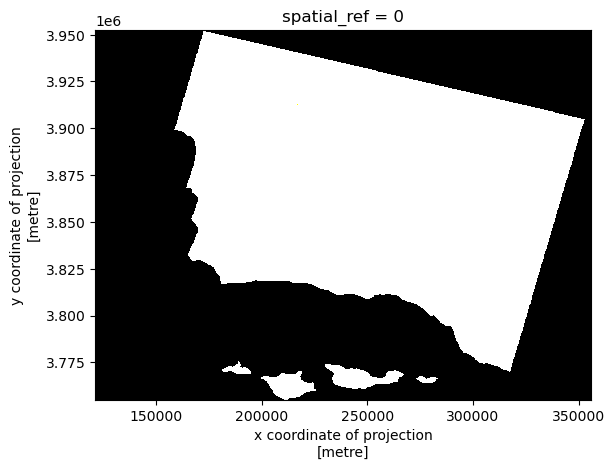

In [5]:
# Visualizing only the red, green, and blue bands from the landsat xarray
landsat[['red','green','blue']].to_array().plot.imshow()

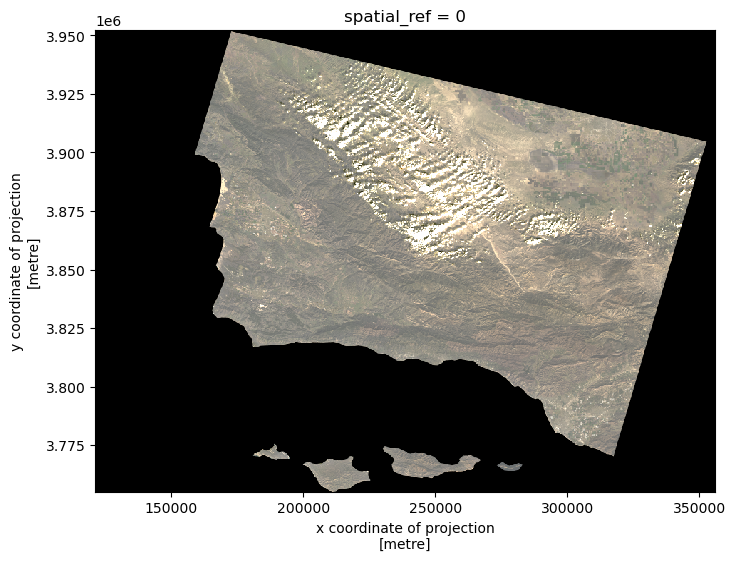

In [6]:
# Adjusting the scale of the data to account for the clouds and get a true color image
landsat[['red','green','blue']].to_array().plot.imshow(size= 6, robust= True)

**Answer for Question 3f.)**
- In the part d, I wasn't able to get a true color image, as I believe the outlier values from the clouds resulted in white reflectance. After specifying the range of colors we were interested in visualizing with the robust setting in `plot.imshow()` set to 'True', I was able to get a true color image for the map in part e